 Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        31
           0       0.00      0.00      0.00        21
           1       0.74      1.00      0.85       148

    accuracy                           0.74       200
   macro avg       0.25      0.33      0.28       200
weighted avg       0.55      0.74      0.63       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


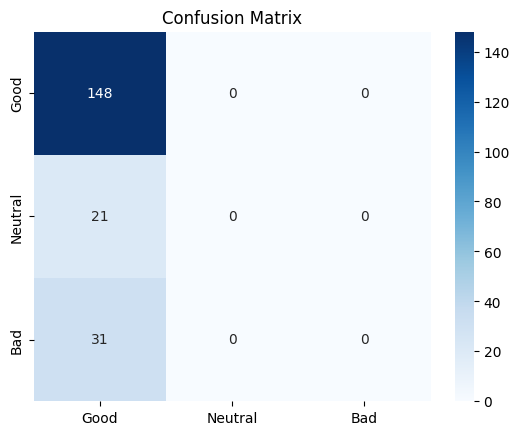


📊 Sentiment Counts:
👍 Good: 982
😐 Neutral: 0
👎 Bad: 17

--- Good Reviews ---
I have bought several of the Vitality canned do...
Product arrived labeled as Jumbo Salted Peanuts...
This is a confection that has been around a few...
If you are looking for the secret ingredient in...
Great taffy at a great price.  There was a wide...

--- Neutral Reviews ---
Series([], )

--- Bad Reviews ---
I don't know how long these sat on the back of ...
I haven't used the ham base. It is loaded with ...
Just awful!  I thought food was supposed to tas...
These are perhaps the worst chips that have eve...
Got these Kettle Chips Sea Salt & Vinegar (15 5...

 Predictions saved to 'review_with_predictions.csv'


In [12]:
# STEP 1: Import Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 2: Load Dataset
df = pd.read_csv("/content/review.csv")

# Use only Rating (Id.6) and Review Text (Id.9)
df = df[['Id.6','Id.9']].dropna()
df.columns = ['Rating','Review']

# STEP 3: Clean Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text.strip()

df['Cleaned_Text'] = df['Review'].apply(clean_text)

# STEP 4: Create Sentiment Labels from Rating
def rating_to_sentiment(rating):
    if rating <= 2:
        return -1   # Bad
    elif rating == 3:
        return 0    # Neutral
    else:
        return 1    # Good

df['Label'] = df['Rating'].apply(rating_to_sentiment)

# STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Label'], test_size=0.2, random_state=42)

# STEP 6: Vectorize Text
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# STEP 7: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# STEP 8: Evaluate
y_pred = model.predict(X_test_vec)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1,0,-1])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Good","Neutral","Bad"], yticklabels=["Good","Neutral","Bad"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# STEP 9: Predict All Reviews
df['Predicted'] = model.predict(vectorizer.transform(df['Cleaned_Text']))

# STEP 10: Separate Reviews
good_reviews = df[df['Predicted'] == 1]['Review']
neutral_reviews = df[df['Predicted'] == 0]['Review']
bad_reviews = df[df['Predicted'] == -1]['Review']

print("\n📊 Sentiment Counts:")
print("👍 Good:", len(good_reviews))
print("😐 Neutral:", len(neutral_reviews))
print("👎 Bad:", len(bad_reviews))

print("\n--- Good Reviews ---")
print(good_reviews.head(5).to_string(index=False))

print("\n--- Neutral Reviews ---")
print(neutral_reviews.head(5).to_string(index=False))

print("\n--- Bad Reviews ---")
print(bad_reviews.head(5).to_string(index=False))

# STEP 11: Save Results
df.to_csv("/content/review_with_predictions.csv", index=False)
print("\n Predictions saved to 'review_with_predictions.csv'")
